In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
#read in the white wine csv file
#read in the columns by splitting the semi-colon
wwine = pd.read_csv("/Users/bianca/Documents/DAT-10-14-BAZ/homework/project-final/data/winequality-white.csv",sep=";")

In [5]:
#take a quick peak at the file 
wwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
#examine the dimensions of the dataset
wwine.shape

(4898, 12)

In [7]:
#check for null values
#there are no null values, making this a complete dataset
wwine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
#check the data types of the values and see that they are all numeric
wwine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [9]:
#examine the summary statistics in order to check if the variables are measured at different scales
#the do scale differently so will contribute unevenly to the analysis
#reminder to standardize data so that it is internally consistent
wwine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [10]:
#check the number of unique values
wwine.nunique()

fixed acidity            68
volatile acidity        125
citric acid              87
residual sugar          310
chlorides               160
free sulfur dioxide     132
total sulfur dioxide    251
density                 890
pH                      103
sulphates                79
alcohol                 103
quality                   7
dtype: int64

In [11]:
#set the color palette to align with vihno verde! 
verde = sns.color_palette("ch:2.5,-.2,dark=.3")

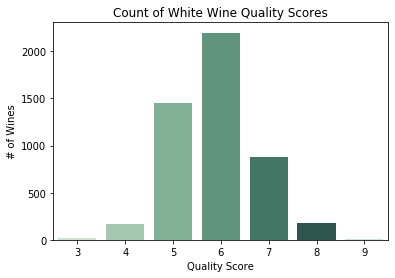

In [12]:
#examine the distribution of the quality scores
sns.countplot(x="quality", data=wwine, palette=verde);
plt.title('Count of White Wine Quality Scores');
plt.xlabel('Quality Score');
plt.ylabel('# of Wines');

In [13]:
wwine["quality"].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [14]:
#build a binary score value that determines if a wine is excellent ('1'; quality score above 6) or not ('0') 
conditions = [wwine['quality']>6]
results = [1]
wwine['score'] = np.select(conditions, results,0)

In [15]:
#double-check datatypes for the new column
wwine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
score                     int64
dtype: object

In [16]:
#look at distribution of excellent wines 
wwine['score'].value_counts()

0    3838
1    1060
Name: score, dtype: int64

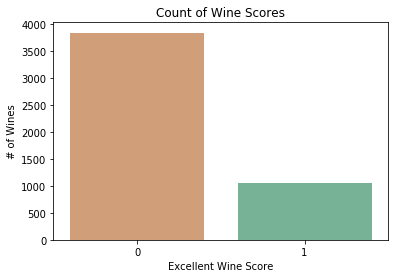

In [25]:
#the data is not balanced in that there are fewer excellent wines
verde_2 = sns.diverging_palette(40,150, s=60, l=70, n=2)
sns.countplot(x='score', data=wwine, palette = verde_2);
plt.title('Count of Wine Scores');
plt.xlabel('Excellent Wine Score');
plt.ylabel('# of Wines');

In [17]:
count_not_excellent = len(wwine[wwine['score']==0])
count_excellent = len(wwine[wwine['score']==1])

In [23]:
print("Percentage of excellent wines:", (count_excellent)/(count_excellent+count_not_excellent)*100)

Percentage of excellent wines: 21.641486320947326


In [18]:
#examine the differences in wine excellence across the independent variables
wwine.groupby('score').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
score,,,,,,,,,,,,
0,6.890594,0.281802,0.336438,6.703478,0.047875,35.517327,141.982934,0.994474,3.180847,0.487004,10.265215,5.519802
1,6.725142,0.265349,0.326057,5.261509,0.038160,34.550472,125.245283,0.992412,3.215132,0.500142,11.416022,7.174528


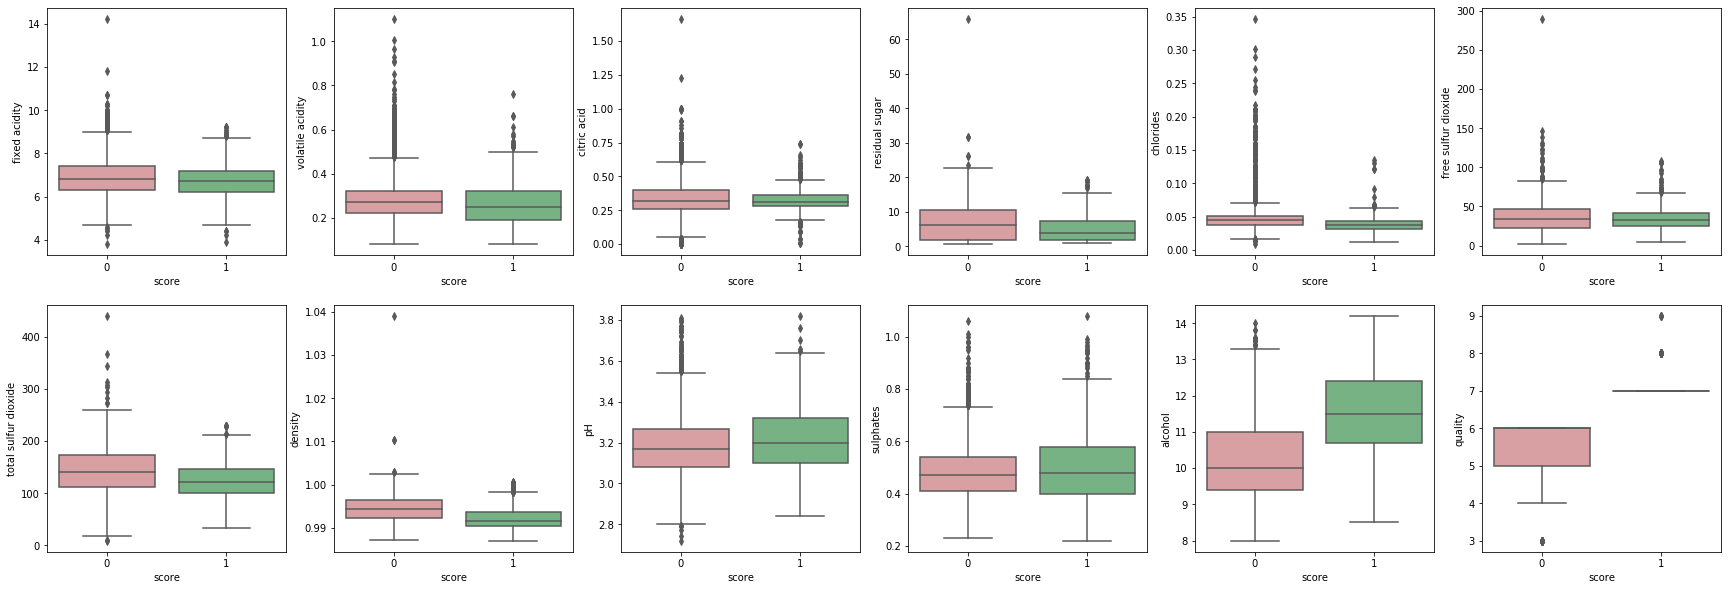

In [19]:
#a graphical look at the ranges for each attribute

f, axes = plt.subplots(2, 6, figsize=(30, 10))
v, h = 0,0

for col in wwine:
    if v <6: 
        sns.boxplot(x='score', y =wwine[col], data=wwine, ax=axes[0,v], palette = verde_2)
        v=v+1
    elif h<6: 
        sns.boxplot(x='score', y =wwine[col], data=wwine, ax=axes[1,h], palette = verde_2)
        h=h+1

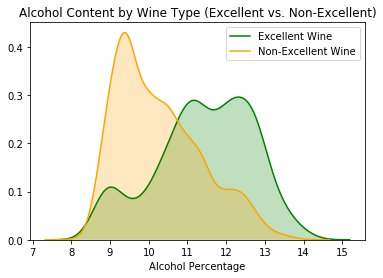

In [20]:
#another view of the mean excellence scores broken out by alcohol content 
sns.distplot(wwine[wwine['score']==1]['alcohol'], hist=False, kde = True, kde_kws={'shade':True},color = 'green', label='Excellent Wine');
sns.distplot(wwine[wwine['score']==0]['alcohol'], hist=False, kde = True, kde_kws={'shade':True}, color = 'orange', label='Non-Excellent Wine');
plt.title('Alcohol Content by Wine Type (Excellent vs. Non-Excellent)');
plt.xlabel('Alcohol Percentage');


In [21]:
#looked a little deeper at the alcohol content
#divided the wines into groups based on % alcohol
conditions = [   
    wwine['alcohol']>11.4,
    wwine['alcohol'].between(10.4,11.4),
    wwine['alcohol'].between(9.5,10.4)
]

results = [
    '1_very high',
    '2_high',
    '3_medium'
]

wwine['alcohol_group'] = np.select(conditions, results,'4_low')

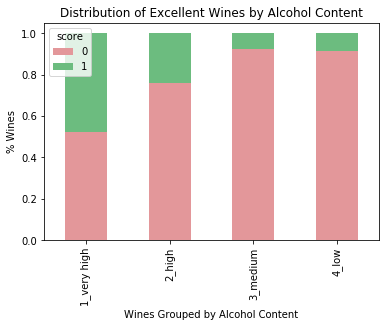

In [22]:
#See that white wines with higher alcohol content also receive higher quality scores
stack = pd.crosstab(wwine.alcohol_group, wwine.score);
stack.div(stack.sum(1), axis=0).plot(kind='bar', stacked=True, color=verde_2);
plt.title('Distribution of Excellent Wines by Alcohol Content');
plt.xlabel('Wines Grouped by Alcohol Content');
plt.ylabel('% Wines');